# Visualising data 

In [1]:
import csv 
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

We consider the previously collected distance data for the **top 10 actors**. 
Data collected with limitation:
- num_of_actors_limit = 5
- num_of_movies_limit = 5
- distance_limit = 3

For a more reliable picture of the relationships, taking into account the selected restrictions, the data were collected in both directions (actor_1, actor_2) and (actor_2, actor_1) and the best result was taken for visualization. Below in the dataframe we can find all the found values.

Let's define the dataframe.

In [2]:
df = pd.read_csv('distances.csv', dtype=object)
df

,actor 1,actor 2,actor1 -> actor2,actor2 -> actor1,distance
0,Dwayne Johnson,Chris Hemsworth,2,2,2
1,Dwayne Johnson,Robert Downey Jr.,3,3,3
2,Dwayne Johnson,Akshay Kumar,inf,inf,inf
3,Dwayne Johnson,Jackie Chan,inf,3,3
4,Dwayne Johnson,Bradley Cooper,3,3,3
5,Dwayne Johnson,Adam Sandler,3,3,3
6,Dwayne Johnson,Scarlett Johansson,3,2,2
7,Dwayne Johnson,Sofia Vergara,inf,3,3
8,Dwayne Johnson,Chris Evans,3,2,2
9,Chris Hemsworth,Robert Downey Jr.,3,1,1


Let's make a short version of the dataframe to better see what data is taken for visualisation.

In [3]:
df = df.drop(columns=['actor1 -> actor2', 'actor2 -> actor1'], axis=1)
df

,actor 1,actor 2,distance
0,Dwayne Johnson,Chris Hemsworth,2
1,Dwayne Johnson,Robert Downey Jr.,3
2,Dwayne Johnson,Akshay Kumar,inf
3,Dwayne Johnson,Jackie Chan,3
4,Dwayne Johnson,Bradley Cooper,3
5,Dwayne Johnson,Adam Sandler,3
6,Dwayne Johnson,Scarlett Johansson,2
7,Dwayne Johnson,Sofia Vergara,3
8,Dwayne Johnson,Chris Evans,2
9,Chris Hemsworth,Robert Downey Jr.,1


### Define the plot graph function.

In [4]:
def plot_graph(df, filter=None):
    # delete edges with no connection (distance = -1)
    df = df.loc[df['distance'] != 'inf']
    # define the data if a filter is chosen
    if filter:
        df = df.loc[df['distance'] == str(filter)]
    # reset indexes   
    df = df.reset_index(drop=True)
    
    n = df.shape[0]
    G = nx.Graph()

    plt.figure(figsize=(10,8))

    # 1 - c, 2 - g, 3 - r
    
    # define edges and set colours depends on distance value
    for i in range(n):
        row_data = df.loc[i].values.tolist()
        if row_data[2] == '1':
            G.add_edge(row_data[0], row_data[1], weight=row_data[2], colour='c')
        if row_data[2] == '2':
            G.add_edge(row_data[0], row_data[1], weight=row_data[2], colour='g')
        if row_data[2] == '3':
            G.add_edge(row_data[0], row_data[1], weight=row_data[2], colour='r')

    # define varibles to plot the edges and labels
    edge_labels_values = nx.get_edge_attributes(G,'weight')
    colours = [G[u][v]['colour'] for u, v in G.edges()]
    
    # define graph shape
    pos = nx.shell_layout(G)
    
    # plot edges and labels
    nx.draw(G, pos, font_size=12, edge_color=colours, width=1, linewidths=1,
            node_size=200, node_color='bisque', alpha=0.9,
            labels={node: node for node in G.nodes()})
    nx.draw_networkx_edge_labels(G, pos, font_size=14, edge_labels=edge_labels_values, font_color='black')

    plt.title('Distance Graph', fontsize=20)
    plt.axis('off')
    plt.show()

### Let's plot the data for all found values of distances.

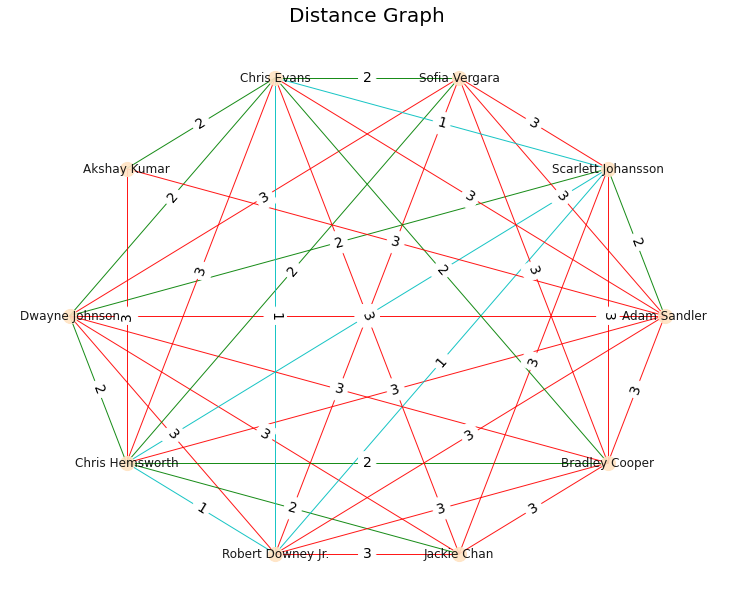

In [5]:
plot_graph(df, filter=None)

## Let's plot the data for the actors with distnces = 1.

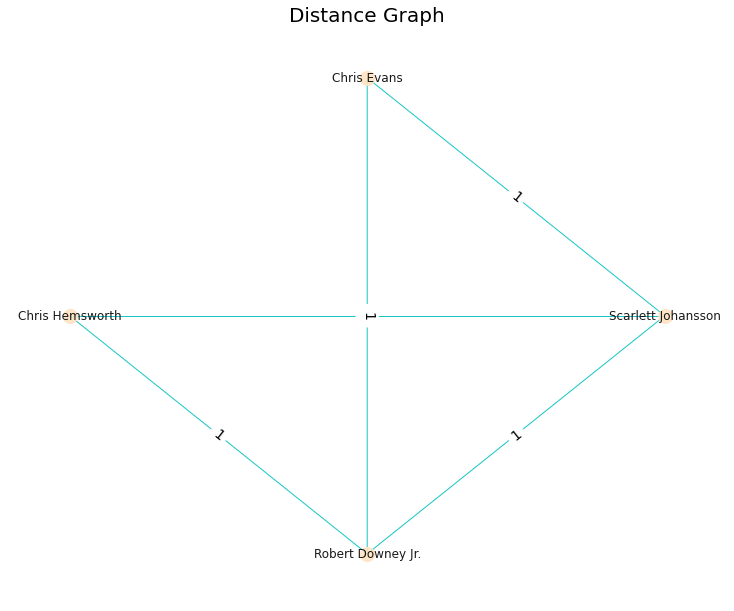

In [6]:
plot_graph(df, filter=1)

### Let's plot the data for the actors with distnces = 2.

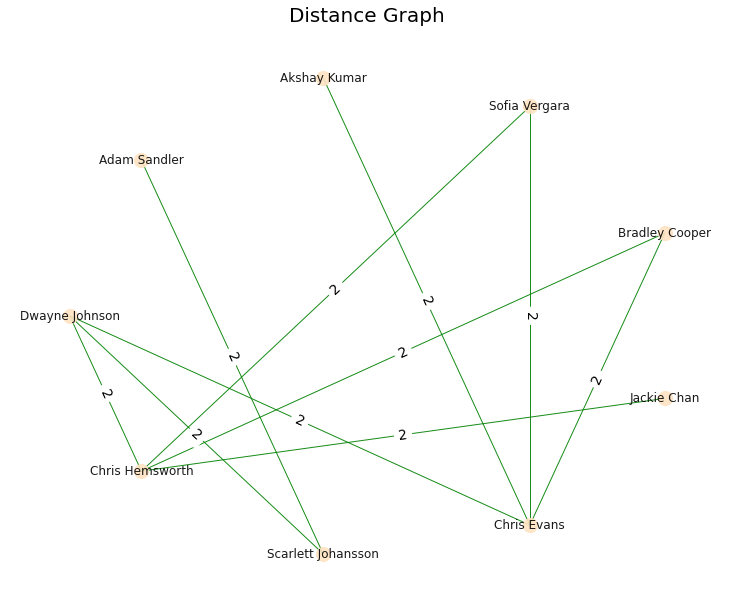

In [7]:
plot_graph(df, filter=2)

### Let's plot the data for the actors with distnces = 3.

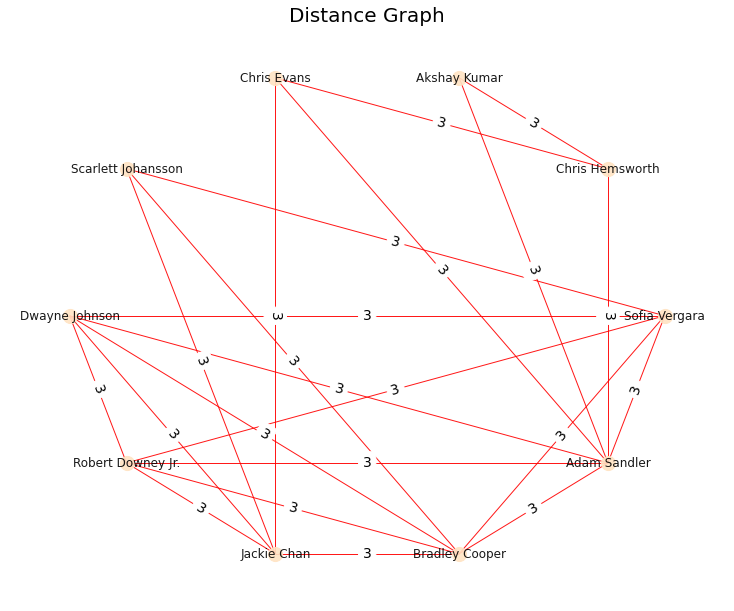

In [8]:
plot_graph(df, filter=3)